# Customer Segmentation

This document will explain how to do customer segementation use K-Means clustering (case in [here](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) )

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib 

import matplotlib.pyplot as plt


In [2]:
import sklearn
sklearn.__version__

'0.20.0'

## Get The Data

In [3]:
df_mall=pd.read_csv('https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv')

In [4]:
df_mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df_mall.shape

(200, 5)

In [6]:
old_colname=df_mall.columns.tolist()
old_colname

['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [7]:
replaced_colname=['cust_id','gender','age','income','spending']

In [8]:
dict_colname=dict(zip(old_colname,replaced_colname))
dict_colname

{'CustomerID': 'cust_id',
 'Genre': 'gender',
 'Age': 'age',
 'Annual Income (k$)': 'income',
 'Spending Score (1-100)': 'spending'}

In [9]:
df_mall2=df_mall.rename(columns=dict_colname)

In [10]:
df_mall2.sample(10)

,cust_id,gender,age,income,spending
34,35,Female,49,33,14
19,20,Female,35,23,98
48,49,Female,29,40,42
99,100,Male,20,61,49
94,95,Female,32,60,42
165,166,Female,36,85,75
32,33,Male,53,33,4
17,18,Male,20,21,66
10,11,Male,67,19,14
169,170,Male,32,87,63


## Simple Exploration

In [11]:
df_mall2.head()

,cust_id,gender,age,income,spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
## Gender
XX=df_mall2.gender.value_counts()
XX

Female    112
Male       88
Name: gender, dtype: int64

In [13]:
## age
df_mall2.age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: age, dtype: float64

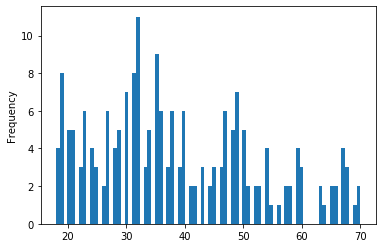

In [14]:
df_mall2.age.plot(kind='hist',bins=80)

In [15]:
## income
#df_mall2['income'].describe()
df_mall2.income.describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: income, dtype: float64

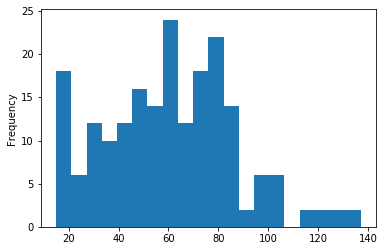

In [16]:
df_mall2.income.plot(kind='hist',bins=20)

In [17]:
## spending
df_mall2.spending.describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: spending, dtype: float64

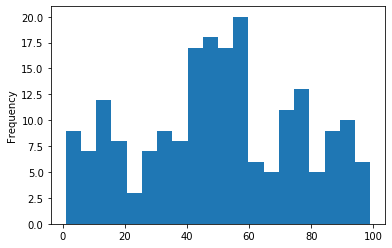

In [18]:
df_mall2.spending.plot(kind='hist',bins=20)

## KMeans Clustering

### First Trials

In [19]:
df_mall2.head()

,cust_id,gender,age,income,spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
X=df_mall2[['age','income','spending']]

In [21]:
Km=KMeans(n_clusters=5)

In [22]:
Km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
df_mall2['clus1']=Km.predict(X)

In [24]:
df_mall2.sample(8)

,cust_id,gender,age,income,spending,clus1
34,35,Female,49,33,14,4
115,116,Female,19,65,50,0
194,195,Female,47,120,16,1
52,53,Female,31,43,54,0
60,61,Male,70,46,56,0
113,114,Male,19,64,46,0
27,28,Male,35,28,61,3
191,192,Female,32,103,69,2


### Cluster Evaluation
silhouette score 

-1 to 1

In [25]:
silhouette_score(X,df_mall2['clus1'])

0.44446409171786105

In [26]:
# K_list=[2,3,4,5,6,7,8,9,10,11,12,13]
K_list=[i+2 for i in range(20)]
data_eval=[]
for k0 in K_list:
    Km0=KMeans(n_clusters=k0)
    Km0.fit(X)
    cls_result=Km0.predict(X)
    silscor=silhouette_score(X,cls_result)
    data_eval.append([k0,silscor])

In [27]:
# data_eval

In [28]:
df_data_eval=pd.DataFrame(data_eval,columns=['k','sils'])
df_data_eval.index=df_data_eval['k']

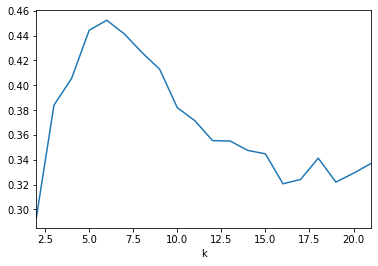

In [29]:
df_data_eval.sils.plot() #--> 6

### Retrain the KMeans

In [30]:
Km1=KMeans(n_clusters=6)
Km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
df_mall2['clus2']=Km1.predict(X)

In [32]:
df_mall2.head()

,cust_id,gender,age,income,spending,clus1,clus2
0,1,Male,19,15,39,4,2
1,2,Male,21,15,81,3,4
2,3,Female,20,16,6,4,2
3,4,Female,23,16,77,3,4
4,5,Female,31,17,40,4,2


## Visual

### Common Visual

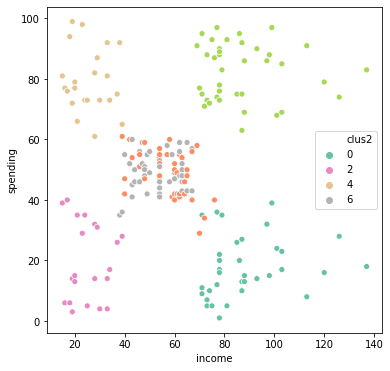

In [33]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_mall2,palette="Set2",
                x='income',y='spending',hue='clus2')

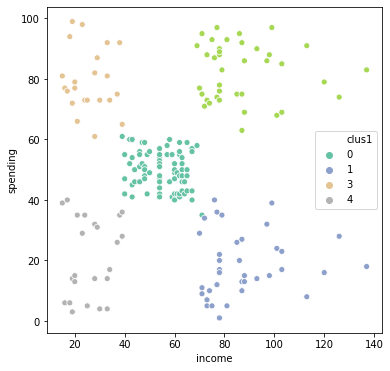

In [34]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_mall2,palette="Set2",
                x='income',y='spending',hue='clus1')

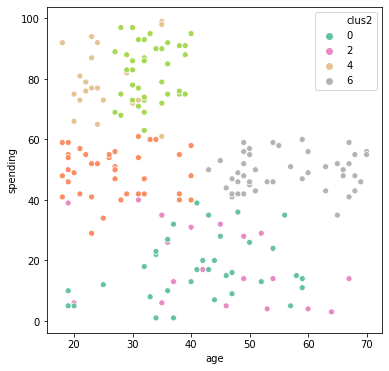

In [35]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_mall2,palette="Set2",
                x='age',y='spending',hue='clus2')

### PCA

In [36]:
pca_model=PCA(n_components=2)

In [37]:
pca_model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
df_mall2[['pca_1','pca_2']]=pd.DataFrame(pca_model.transform(X))

In [39]:
df_mall2.head()

,cust_id,gender,age,income,spending,clus1,clus2,pca_1,pca_2
0,1,Male,19,15,39,4,2,-31.870508,-33.001425
1,2,Male,21,15,81,3,4,0.763397,-56.843865
2,3,Female,20,16,6,4,2,-57.408726,-13.122936
3,4,Female,23,16,77,3,4,-2.169896,-53.477905
4,5,Female,31,17,40,4,2,-32.174920,-30.387005


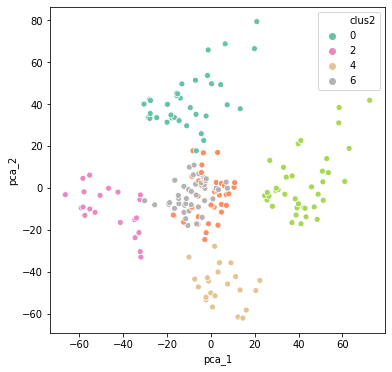

In [40]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_mall2,palette="Set2",
                x='pca_1',y='pca_2',hue='clus2')

## Interpretation

In [41]:
df_intp=df_mall2.groupby('clus2')[['age','income','spending']].mean()
df_intp

,age,income,spending
clus2,,,
0,41.685714,88.228571,17.285714
1,27.000000,56.657895,49.131579
2,44.142857,25.142857,19.523810
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636
5,56.155556,53.377778,49.088889


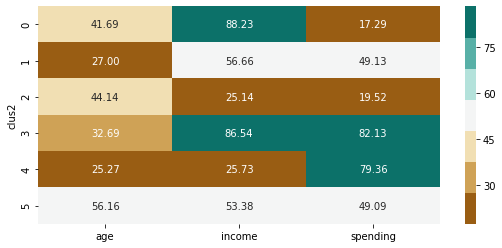

In [42]:
plt.figure(figsize=(9,4))
# sns.scatterplot(data=df_mall2,palette="Set2",
#                 x='pca_1',y='pca_2',hue='clus2')
sns.heatmap(df_intp,annot=True,cmap=sns.color_palette("BrBG", 7),fmt='.2f')

In [43]:
## Use Standar Scaler
scale_mod=StandardScaler()

In [44]:
scale_mod.fit(X)

/Users/alamhanz/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
df_mall2[['age_s','income_s','spending_s']]=pd.DataFrame(scale_mod.transform(X))

/Users/alamhanz/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [46]:
df_mall2.head()

,cust_id,gender,age,income,spending,clus1,clus2,pca_1,pca_2,age_s,income_s,spending_s
0,1,Male,19,15,39,4,2,-31.870508,-33.001425,-1.424569,-1.738999,-0.434801
1,2,Male,21,15,81,3,4,0.763397,-56.843865,-1.281035,-1.738999,1.195704
2,3,Female,20,16,6,4,2,-57.408726,-13.122936,-1.352802,-1.700830,-1.715913
3,4,Female,23,16,77,3,4,-2.169896,-53.477905,-1.137502,-1.700830,1.040418
4,5,Female,31,17,40,4,2,-32.174920,-30.387005,-0.563369,-1.662660,-0.395980


In [47]:
# df_mall2[['age_s','income_s','spending_s']].std()

In [48]:
df_intp2=df_mall2.groupby('clus2')[['age_s','income_s','spending_s']].mean()
df_intp2

,age_s,income_s,spending_s
clus2,,,
0,0.203510,1.056094,-1.277784
1,-0.850435,-0.148941,-0.041478
2,0.379851,-1.351852,-1.190898
3,-0.441917,0.991583,1.239503
4,-0.974396,-1.329545,1.132178
5,1.241962,-0.274141,-0.043135


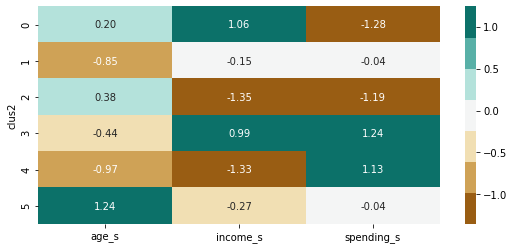

In [49]:
plt.figure(figsize=(9,4))
sns.heatmap(df_intp2,annot=True,cmap=sns.color_palette("BrBG", 7),fmt='.2f')

In [50]:
df_mall2.groupby(['clus2','gender']).size().unstack()

gender,Female,Male
clus2,,
0,15,20
1,25,13
2,13,8
3,21,18
4,13,9
5,25,20


In [51]:
joblib.dump(Km1,"unsupervised_model_example.pkl")

['unsupervised_model_example.pkl']

In [52]:
KM_load=joblib.load("unsupervised_model_example.pkl")

In [53]:
KM_load

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)